In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# pd.set_option('display.max_rows', 500)
import matplotlib.mlab as mlab
df = pd.read_csv('data.csv')
df.tail()

,Year,Film,Song,Composer,Language
145,2019,Manoharam,Akale,Sanjeev T,Malyalam
146,2020,Gauthamante Radham,Uyire,Ankit Menon,Malyalam
147,2020,Maniyarayile Ashokan,Olu,Sreehari K Nair,Malyalam
148,2021,Thala,Poonkodiye,Ankit Menon,Malyalam
149,2021,Kudukku 2025,Maaran,Bhoomee,Malyalam


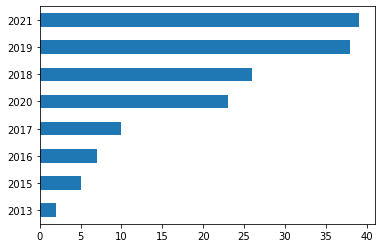

In [2]:
# How many songs has he outputted ? 
df['Year'].value_counts().sort_values().plot(kind = 'barh')

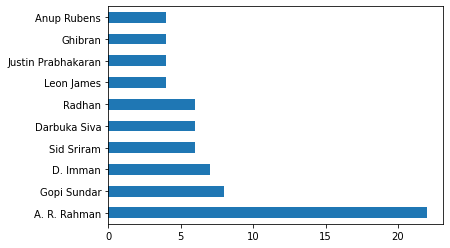

In [3]:
# # How many songs has he outputted ? 
df['Composer'].value_counts().sort_values(ascending=False)[0:10].plot(kind = 'barh')


In [4]:
queries = ['https://www.google.com/search?q= sid sriram ' + item + ' lyrics' for item in df['Song']]

with open('queries.txt', 'w') as f:
    for item in queries:
        f.write("%s\n" % item)

In [5]:
########################################################
########################################################
########################################################
########################################################
# add lyrics files 
########################################################
########################################################
########################################################
########################################################

In [6]:
# compare
# see how many filenames match 
# 146 of 150 not bad 

import glob
files = (glob.glob("lyrics/*"))
compare = [item.replace("sid sriram ","").replace("lyrics\\","").replace("lyrics\\sid sriram ","").replace(" lyrics.txt","") for item in files]
print(len(list(set(list(df['Song'])).intersection(compare))))
print(len(df))

146
150


In [7]:
# figure out matches for text files in db 
songs = list(df['Song'])

# files = (glob.glob("lyrics/*"))
dict_temp = {}
for i in range(0,len(songs)):
    for j in range(0,len(files)):
        parsed = files[j].replace("sid sriram ","").replace("lyrics\\","").replace("lyrics\\sid sriram ","").replace(" lyrics.txt","")
        if parsed == songs[i]:
            dict_temp[songs[i]] = files[j] 
#             print(files[j] + '_____' + songs[i])
matchez = pd.Series(dict_temp).to_frame('location').reset_index(drop=False).rename(columns={'index': 'Song'})

# merge on Song name 
merged = pd.merge(left=df, right=matchez, left_on='Song', right_on='Song')

In [8]:
all_files = []

for item in merged['location']:    
    with open(item, encoding='utf-8') as f:
        lines = f.readlines()
    all_files.append(lines)
    
# remove Male : and Female : 
# remove empty lines 

for i in range(0,len(all_files)):
    for j in range(0,len(all_files[i])):
        all_files[i][j] =all_files[i][j].strip().replace('…','.').replace('..','.').replace('  ',' ').replace('  ',' ').replace('Female :','').replace('\n','').replace('Male :','').replace('.','').replace('.','').replace('.','').replace('.','').replace('.','').replace('.','')

merged['content'] = all_files

# (x5) (x3) etc have to be made into their own lines

In [9]:
merged['original_line_count'] = [len(item) for item in merged['content'] ]
merged['unique_line_count'] = [len(list(set(item))) for item in merged['content'] ]
merged = merged.reset_index(drop=True)

In [10]:
# percentage of unique to regular lines 
# something to do with words in a song 

ind_word = []
for i in range(0, len(merged['content'])):
    temp = []
    for j in range(0,len(merged['content'][i])):
#         print(merged['content'][i][j].split(' '))
        temp.extend(merged['content'][i][j].split(' '))
#     print('______________')
    ind_word.append(temp)

    
merged['ind_word'] = ind_word

In [11]:
merged['original_word_count'] = [len(item) for item in merged['ind_word'] ]
merged['unique_word_count'] = [len(list(set(item))) for item in merged['ind_word'] ]

# percentage of lines copied 
# percentage of words copied 
4
merged['percent_of_lines_copied'] = (((merged['original_line_count'] - merged['unique_line_count']) / merged['original_line_count']) * 100)
merged['percent_of_words_copied'] = ((merged['original_word_count'] - merged['unique_word_count']) / merged['original_word_count']) * 100 
# lexical richness of each artist (i.e., what proportion of the words used in the songs are distinct)
# this is wrong and needs to be fixed 
merged['lexical_richness'] = ((merged['unique_word_count']) / merged['original_word_count'] ) * 100 


In [12]:
# # The number of words per song on average 
#  
# 

print('    ')
print('    ')
print('Average number of lines per song : ' + str(merged.original_line_count.describe()['mean'].round(1)))
print('Average number of unique lines per song : ' + str(merged.unique_line_count.describe()['mean'].round(1)))
print( 'Average number of words per song : ' + str(merged.original_word_count.describe()['mean'].round(1)  ))
print('Average number of unique words per song : '+ str(merged.unique_word_count.describe()['mean'].round(1))  )
print('    ')
print('    ')

# merged.to_csv('merged.csv')

    
    
Average number of lines per song : 53.0
Average number of unique lines per song : 32.3
Average number of words per song : 160.3
Average number of unique words per song : 87.6
    
    


In [13]:
# In what language does he copy the most 
# get weighted percentage based on numhber of songs in each language 
a1 = (merged.groupby(['Language']).mean()[['percent_of_lines_copied','percent_of_words_copied']].round(1))

# In what year does he copy the most 
# has the copying gotten worse or better over time 
a2 = (merged.groupby(['Year']).mean()[['percent_of_lines_copied','percent_of_words_copied']].round(1))

# merged.groupby(['Year','Language']).mean()[['percent_of_lines_copied','percent_of_words_copied']]

a3 = (merged.groupby(['Composer', 'Language']).mean()[['percent_of_lines_copied','percent_of_words_copied']].round(1).sort_values('Language'))

a4 = (merged.groupby(['Composer', 'Language']).mean()[['lexical_richness']].round(1).sort_values('Language'))




In [14]:
a1.columns =['duplicated_lines_percentage', 'duplicated_words_percentage']
a2.columns =['duplicated_lines_percentage', 'duplicated_words_percentage']
# a3.columns =['duplicated_lines_percentage', 'duplicated_words_percentage']


a4 = a4.reset_index(drop=False)

In [32]:
# a3 = a3.reset_index(drop=False)

temax =  a3[a3['Language'] == 'Telugu'].sort_values('percent_of_lines_copied').head(5)
temin = a3[a3['Language'] == 'Telugu'].sort_values('percent_of_lines_copied').tail(5)
tamax = a3[a3['Language'] == 'Tamil'].sort_values('percent_of_lines_copied').head(5)
tamin = a3[a3['Language'] == 'Tamil'].sort_values('percent_of_lines_copied').tail(5)

mamax = a3[a3['Language'] == 'Malyalam'].sort_values('percent_of_lines_copied').head(5)

mamin = a3[a3['Language'] == 'Malyalam'].sort_values('percent_of_lines_copied').tail(5)


In [33]:
mamin

,level_0,index,Composer,Language,percent_of_lines_copied,percent_of_words_copied
3,3,3,Ankit Menon,Malyalam,20.1,30.5
5,5,5,Bhoomee,Malyalam,21.2,25.7
2,2,2,Justin Prabhakaran,Malyalam,26.0,26.8
0,0,0,Jakes Bejoy,Malyalam,29.2,38.5
1,1,1,Sreehari K Nair,Malyalam,55.2,61.1


In [34]:
mamax

,level_0,index,Composer,Language,percent_of_lines_copied,percent_of_words_copied
4,4,4,Sanjeev T,Malyalam,4.3,3.5
3,3,3,Ankit Menon,Malyalam,20.1,30.5
5,5,5,Bhoomee,Malyalam,21.2,25.7
2,2,2,Justin Prabhakaran,Malyalam,26.0,26.8
0,0,0,Jakes Bejoy,Malyalam,29.2,38.5


In [149]:
# a4[a4['Language'] == 'Telugu'].sort_values('lexical_richness')

# a4[a4['Language'] == 'Tamil'].sort_values('lexical_richness')


In [151]:
# agverage sid sriram song 
# replicate for tamil as well . 
from collections import Counter
    
all_tel = []
for i in range(0,len(merged)):
    if merged['Language'][i]=='Telugu':
        all_tel.extend(merged['content'][i])

(Counter(all_tel).most_common())[1:15]
# (Counter(all_tel))

[('Yadike Yadike', 14),
 ('నువ్వుంటే నా జతగా నేనుంటా ఊపిరిగా', 14),
 ('ఏమో ఏమో ఏమో', 14),
 ('Theeskelathaav neethopaate', 12),
 ('Yemunnave pilla yemunnave', 12),
 ('మాటే వినదుగ వినదుగ వినదుగ', 8),
 ('ఈ మాయ పేరేమిటో ఏమిటో', 8),
 ('Amma amma nee vennela', 8),
 ('Nithyaam napai undaalilaa', 8),
 ('Jhum tanatana jhum tananana', 8),
 ('నా ప్రియమౌ ప్రియమౌ batteryవే విడిచి వెళ్ళిపోద్దే', 7),
 ('Nee valle ta ta thapum', 6),
 ('మాయో', 6),
 ('తదిగిన తకజను', 6)]

In [41]:

# most common words used - dump as addition to most common lines 
from collections import Counter

    
all_tel = []
for i in range(0,len(merged)):
    if merged['Language'][i]=='Telugu':
        all_tel.extend(merged['ind_word'][i])

(Counter(all_tel).most_common())[0:30]

[('', 398),
 ('నా', 148),
 ('నీ', 88),
 ('Nee', 65),
 ('ఈ', 56),
 ('నువ్వే', 49),
 ('Naa', 34),
 ('nee', 31),
 ('ఓ', 31),
 ('చిన్ని', 30),
 ('ఏమో', 29),
 ('మనసా', 29),
 ('జతగా', 28),
 ('నే', 28),
 ('వినదుగ', 28),
 ('Yadike.', 27),
 ('Mella', 27),
 ('ప్రియమౌ', 26),
 ('నేనుంటా', 24),
 ('Ee', 24),
 ('Na', 24),
 ('ఏమో..', 24),
 ('నువ్వుంటే', 23),
 ('నన్నే', 23),
 ('వేగం', 23),
 ('ఏ', 22),
 ('నన్ను', 21),
 ('ఊపిరిగా', 18),
 ('ఆ', 18),
 ('naa', 17)]

In [68]:

# a = [x for x in list(Counter(all_tel).values()) if x != 1  ]

# plt.hist(a, density=False, bins=120)  # density=False would make counts
# plt.ylabel('Probability')
# plt.xlabel('Data')
# plt.show()


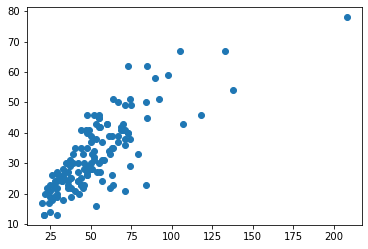

In [42]:

plt.scatter(merged['original_line_count'] ,merged['unique_line_count'] )
plt.show()

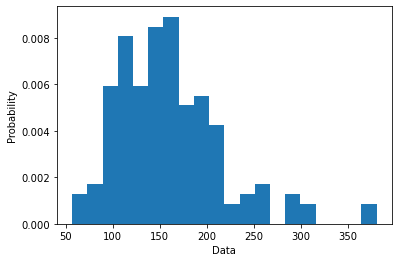

In [43]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)

plt.hist(merged['original_word_count'], density=True, bins=20)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')
plt.show()



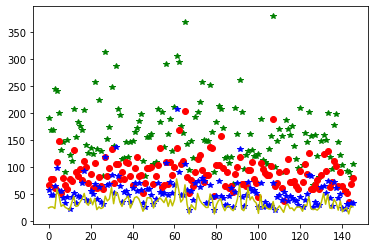

In [44]:
import matplotlib.pyplot as plt
plt.plot(merged['original_word_count'],'g*', merged['unique_word_count'], 'ro')
plt.plot(merged['original_line_count'],'b*', merged['unique_line_count'], 'y')
plt.show()

# shit on lyrictsts  
# telugu mov dialogues LSTM network 

In [45]:
# can build some kindof lstm model , but before that need to get everything into english
# Use selenium to get into google translate and copy over the content  ? 

# NOT WORKING :/ 
# !pip install googletrans
# import googletrans
# from googletrans import Translator
# translator = Translator()
# result = translator.translate('Mikä on nimesi', src='fi')


# # Does not do tamil or telugu - o well :/ 
# !pip install translate
# from translate import Translator
# translator= Translator(to_lang="English")
# translation = translator.translate(str(merged.content[82][1]))
# print(translation)


In [46]:
# eh , pass . too much effort 
# # ! pip install webdriver_manager 
# # ! pip install pyautogui 

# import requests 
# import json 
# import base64 
# from selenium import webdriver 
# from webdriver_manager.chrome import ChromeDriverManager 
# from selenium.webdriver.chrome.options import Options 
# from webdriver_manager.utils import ChromeType 
# import os 
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC 
# from selenium.webdriver.common.by import By 
# from bs4 import BeautifulSoup 
# from selenium.webdriver.support.ui import Select 
# import time 
# def driver_obj():
#     chrome_options_list = ['--no-sandbox','--disable-dev-shm-usage','--disable-gpu', '--start-maximized','--disable-infobars','--disable-extensions']
#     chrome_options = Options()
#     for i in range(0,len(chrome_options_list)):
#         chrome_options.add_argument(chrome_options_list[i])
#     driver = webdriver.Chrome(ChromeDriverManager(latest_release_url='https://chromedriver.storage.googleapis.com/LATEST_RELEASE',url='https://chromedriver.storage.googleapis.com').install(), options=chrome_options)
#     driver.maximize_window()
#     return driver


# driver = driver_obj()
# driver.get('https://www.google.com/search?q=' + 'google translate')
# time.sleep(2)
# aa = BeautifulSoup(driver.page_source, "html.parser")

# import time 
# import pyautogui
# pyautogui.click(365,457) 
# time.sleep(5)


# import pyperclip
# pyperclip.copy("పచ్చ పచ్చ పచ్చి మట్టి బొమ్మలా")

# pyautogui.keyDown('ctrl')
# pyautogui.press('v')
# pyautogui.keyUp('ctrl')  


# time.sleep(3)
# pyautogui.click(549,559) 

# time.sleep(3)
# spam = pyperclip.paste()
# print(spam)

# time.sleep(10)
# driver.quit()


